In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split

In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

In [3]:
df

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


Elimino la columna 'Unnamed: 0' porque es un indice que esta de mas.


In [4]:
df = df.drop("Unnamed: 0", axis=1)

Segun el enunciado, unicamente nos interesan las ciudades Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport por lo que filtro el DataSet para quedarme unicamente con los datos de dichas ciudades.

Tambien elimino de una vez la variable 'Location' debido a que el enunicado declara que se pueden considerar como una unica ubicacion.


In [5]:
ciudades = [
    " Adelaide",
    "Canberra",
    "Cobar",
    "Dartmoor",
    "Melbourne",
    "MelbourneAirport",
    "MountGambier",
    "Sydney",
    "SydneyAirport",
]
df = df[df["Location"].isin(ciudades)]
df = df.drop("Location", axis=1)

In [6]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


Hago el split en df_train y df_test a partir de una fecha determinada para dejar aproximadamente un 80% de mis datos en Train y 20% en Test.


In [7]:
# Convierto la columna 'Date' a tipo datetime
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
fecha_limite = "2016-01-01"

df_train = df[df["Date"] < fecha_limite]

df_test = df[df["Date"] >= fecha_limite]

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 20713
Tamaño del conjunto de prueba: 4328


---


Observo una descripcion, el tipo de dato y los valores nulos de cada variable.


In [9]:
df_train.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,20713,20271.000000,20284.000000,19981.000000,19461.000000,17369.000000,19159.000000,20366.000000,20382.000000,20023.000000,20068.000000,20008.000000,20016.000000,15867.000000,15593.000000,20258.000000,20265.000000,19981.000000
mean,2012-04-24 22:18:46.596823040,10.955991,21.647510,2.062940,4.675207,6.809471,42.885015,15.986252,20.811500,69.661489,50.862916,1018.303134,1016.178991,4.572761,4.687616,15.168388,20.142990,2.061859
min,2007-11-01 00:00:00,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,5.000000,1.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,2010-06-10 00:00:00,7.100000,16.500000,0.000000,2.200000,3.700000,33.000000,9.000000,15.000000,58.000000,37.000000,1013.400000,1011.300000,1.000000,2.000000,11.100000,15.200000,0.000000
50%,2012-04-17 00:00:00,10.600000,20.800000,0.000000,4.000000,7.300000,41.000000,15.000000,20.000000,71.000000,50.000000,1018.500000,1016.300000,6.000000,6.000000,14.700000,19.300000,0.000000
75%,2014-03-24 00:00:00,14.900000,25.800000,1.000000,6.400000,10.000000,52.000000,20.000000,26.000000,83.000000,64.000000,1023.400000,1021.200000,7.000000,7.000000,18.900000,24.200000,1.000000
max,2015-12-31 00:00:00,30.500000,46.800000,119.400000,64.800000,14.300000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000,119.400000
std,NaN,5.741061,6.573869,6.446013,3.401770,3.853102,14.462229,9.778937,9.218541,18.437859,20.014269,7.370028,7.236090,2.814362,2.619433,5.655393,6.410891,6.445336


In [10]:
df_train.dtypes

Date                datetime64[ns]
MinTemp                    float64
MaxTemp                    float64
Rainfall                   float64
Evaporation                float64
Sunshine                   float64
WindGustDir                 object
WindGustSpeed              float64
WindDir9am                  object
WindDir3pm                  object
WindSpeed9am               float64
WindSpeed3pm               float64
Humidity9am                float64
Humidity3pm                float64
Pressure9am                float64
Pressure3pm                float64
Cloud9am                   float64
Cloud3pm                   float64
Temp9am                    float64
Temp3pm                    float64
RainToday                   object
RainTomorrow                object
RainfallTomorrow           float64
dtype: object

In [11]:
df_train.isnull().sum()

Date                   0
MinTemp              442
MaxTemp              429
Rainfall             732
Evaporation         1252
Sunshine            3344
WindGustDir         1557
WindGustSpeed       1554
WindDir9am          1229
WindDir3pm           401
WindSpeed9am         347
WindSpeed3pm         331
Humidity9am          690
Humidity3pm          645
Pressure9am          705
Pressure3pm          697
Cloud9am            4846
Cloud3pm            5120
Temp9am              455
Temp3pm              448
RainToday            732
RainTomorrow         732
RainfallTomorrow     732
dtype: int64

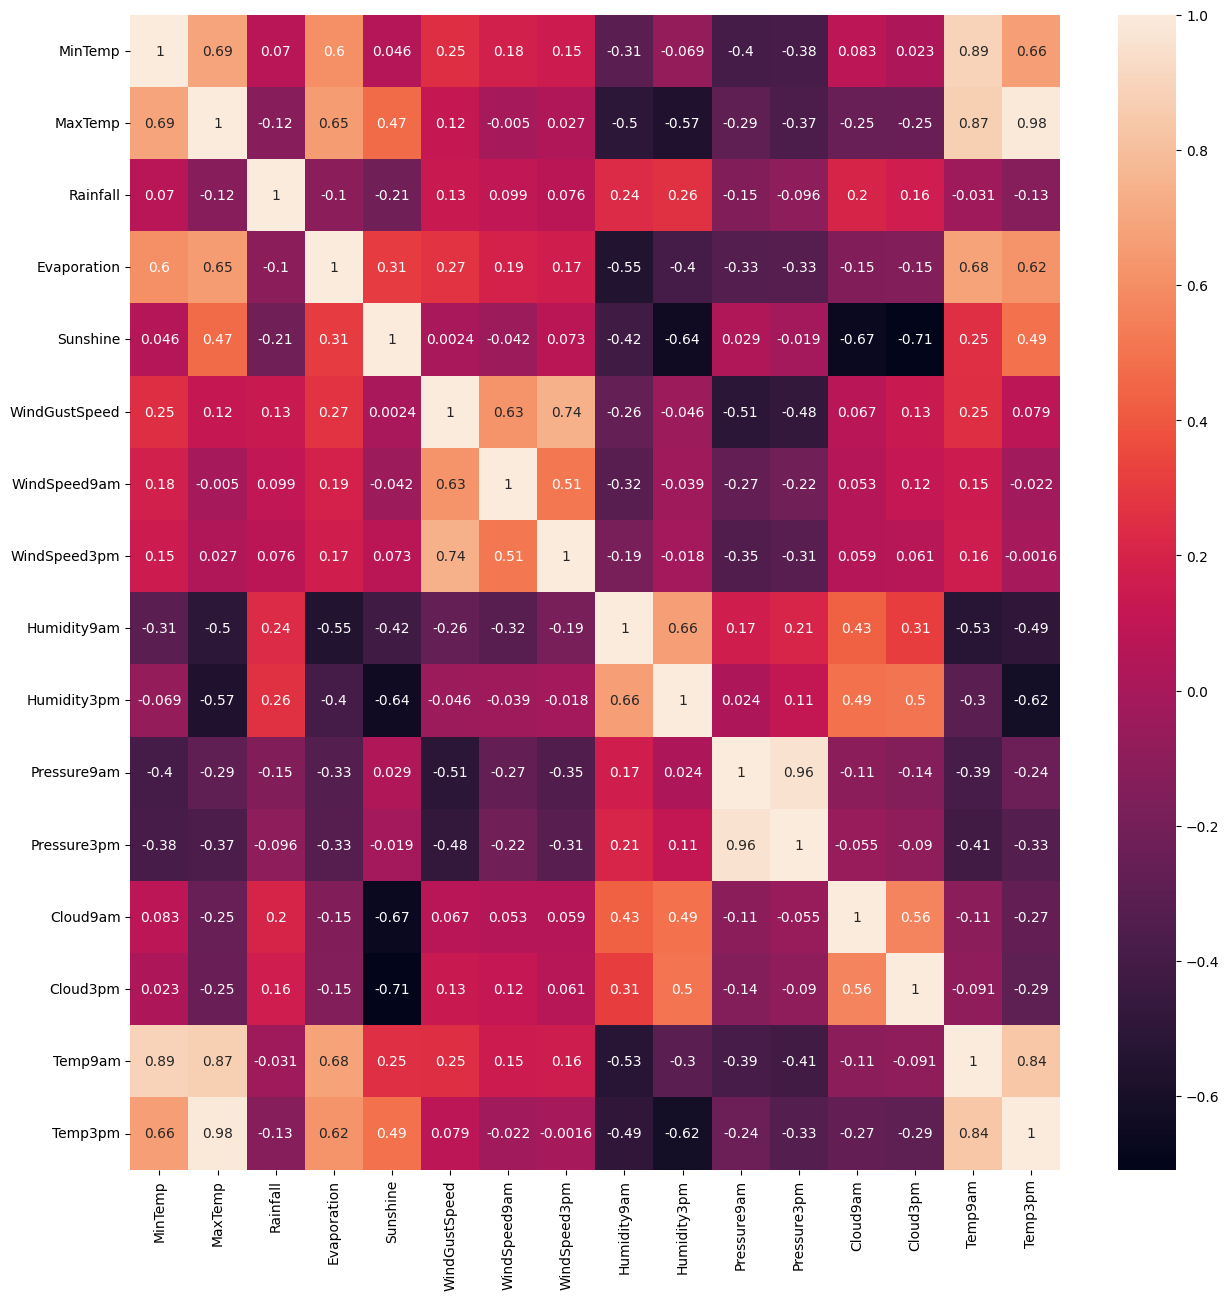

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train[
        [
            "MinTemp",
            "MaxTemp",
            "Rainfall",
            "Evaporation",
            "Sunshine",
            "WindGustSpeed",
            "WindSpeed9am",
            "WindSpeed3pm",
            "Humidity9am",
            "Humidity3pm",
            "Pressure9am",
            "Pressure3pm",
            "Cloud9am",
            "Cloud3pm",
            "Temp9am",
            "Temp3pm",
        ]
    ].corr(),
    annot=True,
)
plt.show()

Para rellenar valores nulos, decidi agregar una columna a mi df donde especifico el **Bimestre del año** al que pertenece cada registro, esto lo hago para tener de alguna manera los datos mas segmentados y no calcular una Media, Mediana, o lo que corresponda sobre todos los datos juntos ya que por ejemplo, las temperaturas, vientos, lluvias, etc. pueden no ser lo mismo al inicio del año como por la mitad o al final.


In [13]:
def determinar_bimestre(fecha):
    mes = fecha.month
    if 1 <= mes <= 2:
        return "Bimestre 1"
    elif 3 <= mes <= 4:
        return "Bimestre 2"
    elif 5 <= mes <= 6:
        return "Bimestre 3"
    elif 7 <= mes <= 8:
        return "Bimestre 4"
    elif 9 <= mes <= 10:
        return "Bimestre 5"
    else:
        return "Bimestre 6"

In [14]:
# Aplicamos la función determinar_bimestre al DataFrame df_filtrado
df_train["Bimestre"] = df_train["Date"].apply(lambda x: determinar_bimestre(x))

df_train

/tmp/ipykernel_81584/3967154836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Bimestre"] = df_train["Date"].apply(lambda x: determinar_bimestre(x))


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Bimestre
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0,Bimestre 1
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0,Bimestre 1
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0,Bimestre 1
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0,Bimestre 1
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0,Bimestre 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,6.1,22.0,0.0,4.6,11.2,SSW,39.0,SSW,S,...,1024.5,1025.0,5.0,6.0,17.0,19.9,No,No,0.0,Bimestre 6
101975,2015-12-28,7.0,25.3,0.0,5.6,13.6,SSW,44.0,ESE,S,...,1026.6,1024.1,1.0,0.0,17.1,23.4,No,No,0.0,Bimestre 6
101976,2015-12-29,8.2,31.3,0.0,6.6,13.6,SW,41.0,ENE,SSW,...,1022.9,1019.4,0.0,0.0,18.3,28.7,No,No,0.0,Bimestre 6
101977,2015-12-30,9.0,38.1,0.0,4.8,13.6,W,50.0,NNE,W,...,1014.8,1011.4,6.0,6.0,26.3,36.1,No,No,0.0,Bimestre 6


# Variable: Rainfall.


In [15]:
print(df_train["Rainfall"].isnull().sum())

732


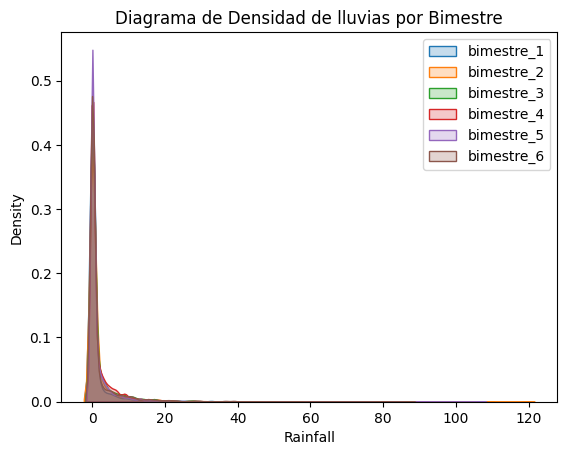

In [16]:
# Diagrama de desidades de la variable RainFall
bimestre_1 = df_train[df_train["Bimestre"] == "Bimestre 1"]
bimestre_2 = df_train[df_train["Bimestre"] == "Bimestre 2"]
bimestre_3 = df_train[df_train["Bimestre"] == "Bimestre 3"]
bimestre_4 = df_train[df_train["Bimestre"] == "Bimestre 4"]
bimestre_5 = df_train[df_train["Bimestre"] == "Bimestre 5"]
bimestre_6 = df_train[df_train["Bimestre"] == "Bimestre 6"]


bandwidth = 0.5
sns.kdeplot(
    data=bimestre_1["Rainfall"], fill=True, label="bimestre_1", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_2["Rainfall"], fill=True, label="bimestre_2", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_3["Rainfall"], fill=True, label="bimestre_3", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_4["Rainfall"], fill=True, label="bimestre_4", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_5["Rainfall"], fill=True, label="bimestre_5", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_6["Rainfall"], fill=True, label="bimestre_6", bw_adjust=bandwidth
)
plt.title("Diagrama de Densidad de lluvias por Bimestre")
plt.xlabel("Rainfall")
plt.legend()

Puedo apreciar que la densidad de lluvia no depende del bimestre, por lo que, en este caso, no haria falta hacer esta diferenciacion.


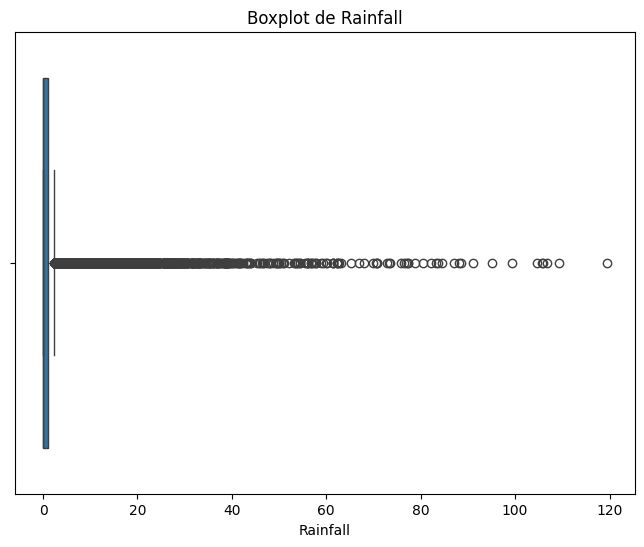

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Rainfall", data=df_train)
plt.title("Boxplot de Rainfall")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable RainFall


In [18]:
mediana_por_dia = df_train.groupby(df["Date"].dt.date)["Rainfall"].median()

df_train["Rainfall"] = df_train.apply(
    lambda row: (
        mediana_por_dia[row["Date"].date()]
        if pd.isnull(row["Rainfall"])
        else row["Rainfall"]
    ),
    axis=1,
)

/tmp/ipykernel_81584/815641413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Rainfall"] = df_train.apply(


# Variable: Evaporation.


In [19]:
print(df_train["Evaporation"].isnull().sum())

1252


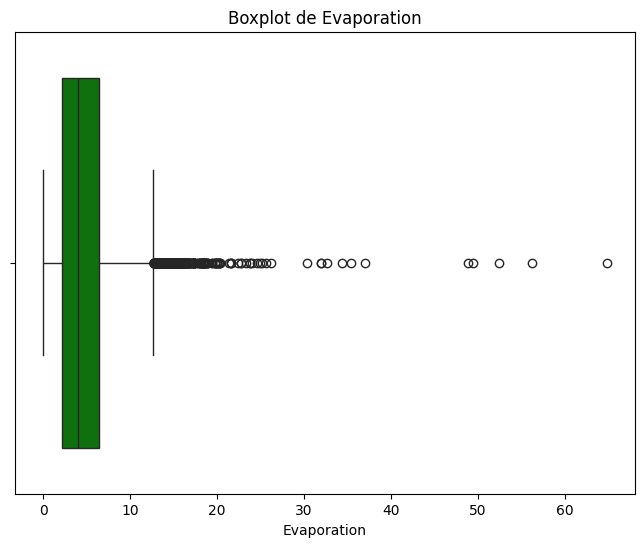

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Evaporation", data=df_train, color="green")
plt.title("Boxplot de Evaporation")
# plt.ylabel("MaxTemp")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable **Evaporation**


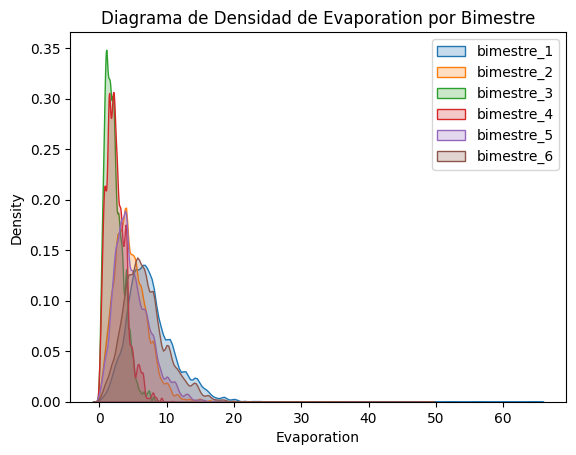

In [21]:
# Diagrama de desidades de la variable Evaporation
bimestre_1 = df_train[df_train["Bimestre"] == "Bimestre 1"]
bimestre_2 = df_train[df_train["Bimestre"] == "Bimestre 2"]
bimestre_3 = df_train[df_train["Bimestre"] == "Bimestre 3"]
bimestre_4 = df_train[df_train["Bimestre"] == "Bimestre 4"]
bimestre_5 = df_train[df_train["Bimestre"] == "Bimestre 5"]
bimestre_6 = df_train[df_train["Bimestre"] == "Bimestre 6"]


bandwidth = 0.5
sns.kdeplot(
    data=bimestre_1["Evaporation"], fill=True, label="bimestre_1", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_2["Evaporation"], fill=True, label="bimestre_2", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_3["Evaporation"], fill=True, label="bimestre_3", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_4["Evaporation"], fill=True, label="bimestre_4", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_5["Evaporation"], fill=True, label="bimestre_5", bw_adjust=bandwidth
)
sns.kdeplot(
    data=bimestre_6["Evaporation"], fill=True, label="bimestre_6", bw_adjust=bandwidth
)
plt.title("Diagrama de Densidad de Evaporation por Bimestre")
plt.xlabel("Evaporation")
plt.legend()

En este caso se puede apreciar una variacion en la densidad de la variable Evaporation respecto del bimestre.


In [22]:
bim = df_train.groupby("Bimestre")
medians = bim["Evaporation"].median()

for bimestre, median in medians.items():
    df_train.loc[
        (df_train["Bimestre"] == bimestre) & (df_train["Evaporation"].isnull()),
        "Evaporation",
    ] = median

# Variable: Sunshine.


In [23]:
print(df_train["Sunshine"].isnull().sum())

3344


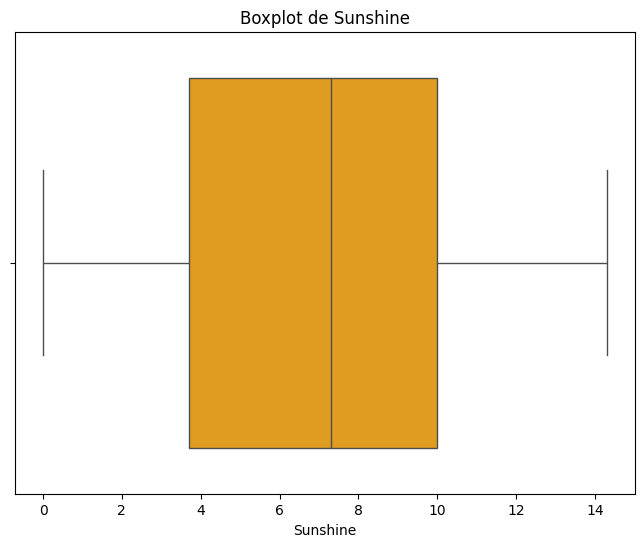

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sunshine", data=df_train, color="orange")
plt.title("Boxplot de Sunshine")
plt.show()

La distribucion de la variable Sunshine se ve bastante balanceada y sin presencia de outliers por lo que utilizo la **Media** para imputar a los valores nulos.


In [25]:
df_train["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)

/tmp/ipykernel_81584/368894277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(


# Variables: WindGustDir, WindDir9am y WindDir3pm.


In [26]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

1557
1229
401


Relleno los valores faltantes para cada variable utilizando la **Moda** de cada dia.


In [27]:
df_train["WindGustDir"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir9am"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir3pm"
].transform(lambda x: x.fillna(x.mode().iloc[0]))

/tmp/ipykernel_81584/1563783170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindGustDir"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/1563783170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindDir9am"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/1563783170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# Variables: WindGustSpeed, WindSpeed9am y WindSpeed3pm.


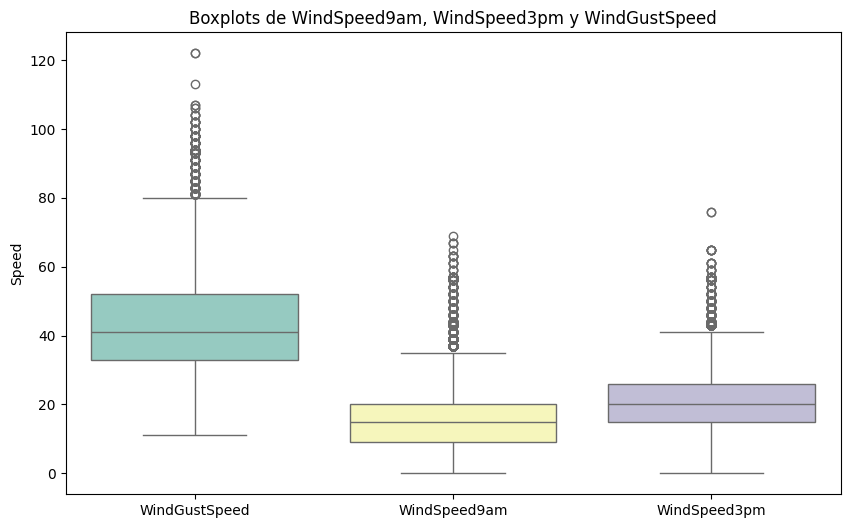

In [28]:
data_to_plot = df_train[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set3")
plt.title("Boxplots de WindSpeed9am, WindSpeed3pm y WindGustSpeed")
plt.ylabel("Speed")
plt.show()

Se observa una gran presencia de outlaiers en las 3 variables por lo que procedo a imputar los valores nulos utilizando la **Mediana**.


In [29]:
df_train["WindGustSpeed"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_81584/1641093522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindGustSpeed"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/1641093522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindSpeed9am"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/1641093522.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Genero una nueva columna llamada 'Dif_WindSpeed' imputandole el valor correspondiente a la diferencia de las columnas 'WindSpeed9am' y 'WindSpeed3pm' **( 'WindSpeed9am' - 'WindSpeed3pm' )**


In [30]:
df_train["WindSpeed_Difference"] = df_train["WindSpeed9am"] - df_train["WindSpeed3pm"]
df_train.drop(["WindSpeed9am", "WindSpeed3pm"], axis=1, inplace=True)

/tmp/ipykernel_81584/1197752358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindSpeed_Difference"] = df_train["WindSpeed9am"] - df_train["WindSpeed3pm"]
/tmp/ipykernel_81584/1197752358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["WindSpeed9am", "WindSpeed3pm"], axis=1, inplace=True)


# Variables: Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, Pressure9am y Pressure3pm.


In [31]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

690
645
4846
5120
705
697


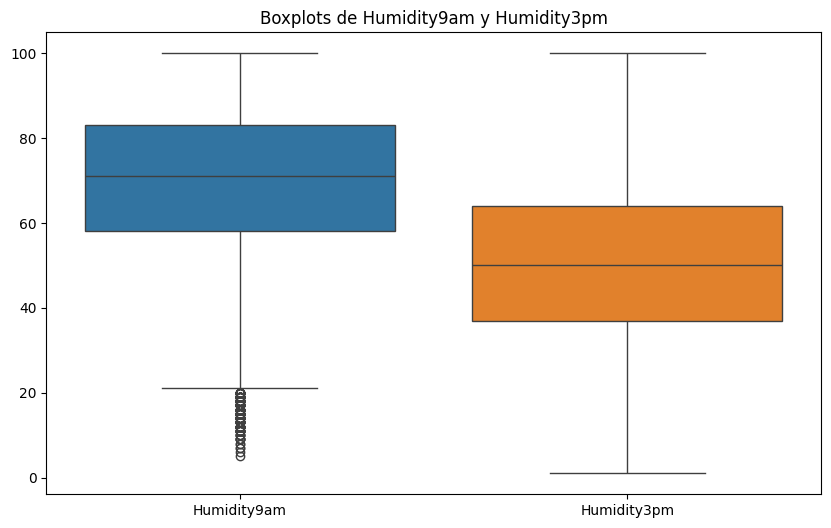

In [32]:
data_to_plot = df_train[["Humidity9am", "Humidity3pm"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title("Boxplots de Humidity9am y Humidity3pm")
plt.show()

In [33]:
df_train["Humidity9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "Humidity9am"
].transform(lambda x: x.fillna(x.median()))
df_train["Humidity3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "Humidity3pm"
].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_81584/1948275591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Humidity9am"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/1948275591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Humidity3pm"] = df_train.groupby(df_train["Date"].dt.day)[


Genero una nueva columna llamada 'Dif_Humidity' imputandole el valor correspondiente a la diferencia de las columnas 'Humidity9am' y 'HUmidity3pm' **( 'Humidity9am' - 'Humidity3pm' )**


In [34]:
df_train["Humidity_Difference"] = df_train["Humidity9am"] - df_train["Humidity3pm"]
df_train.drop(["Humidity9am", "Humidity3pm"], axis=1, inplace=True)

/tmp/ipykernel_81584/242255481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Humidity_Difference"] = df_train["Humidity9am"] - df_train["Humidity3pm"]
/tmp/ipykernel_81584/242255481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Humidity9am", "Humidity3pm"], axis=1, inplace=True)


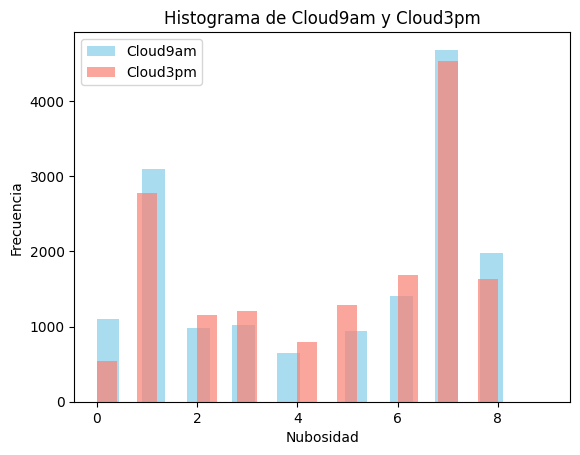

In [35]:
plt.hist(df_train["Cloud9am"], bins=20, color="skyblue", alpha=0.7, label="Cloud9am")
plt.hist(df_train["Cloud3pm"], bins=20, color="salmon", alpha=0.7, label="Cloud3pm")
plt.xlabel("Nubosidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Cloud9am y Cloud3pm")
plt.legend()
plt.show()

In [36]:
df_train["Cloud9am"] = df_train.groupby(df_train["Date"].dt.day)["Cloud9am"].transform(
    lambda x: x.fillna(x.median())
)
df_train["Cloud3pm"] = df_train.groupby(df_train["Date"].dt.day)["Cloud3pm"].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipykernel_81584/2343401268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Cloud9am"] = df_train.groupby(df_train["Date"].dt.day)["Cloud9am"].transform(
/tmp/ipykernel_81584/2343401268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Cloud3pm"] = df_train.groupby(df_train["Date"].dt.day)["Cloud3pm"].transform(


Genero una nueva columna llamada 'Dif_Cloud' imputandole el valor correspondiente a la diferencia de las columnas 'Humidity9am' y 'HUmidity3pm' **( 'Cloud9am' - 'Cloud3pm' )**


In [37]:
df_train["Cloud_Difference"] = df_train["Cloud9am"] - df_train["Cloud3pm"]
df_train.drop(["Cloud9am", "Cloud3pm"], axis=1, inplace=True)

/tmp/ipykernel_81584/849362930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Cloud_Difference"] = df_train["Cloud9am"] - df_train["Cloud3pm"]
/tmp/ipykernel_81584/849362930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Cloud9am", "Cloud3pm"], axis=1, inplace=True)


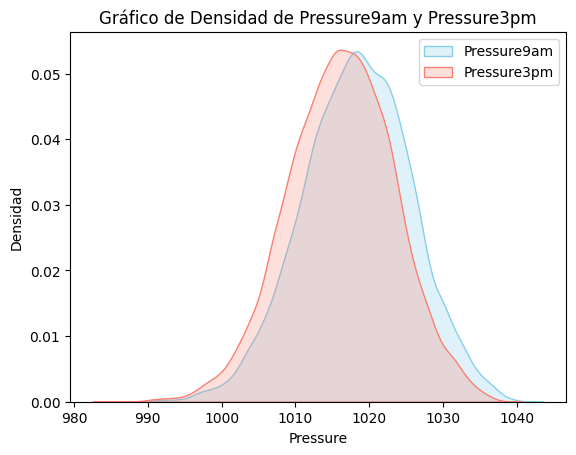

In [38]:
sns.kdeplot(df_train["Pressure9am"], color="skyblue", label="Pressure9am", fill=True)
sns.kdeplot(df_train["Pressure3pm"], color="salmon", label="Pressure3pm", fill=True)
plt.xlabel("Pressure")
plt.ylabel("Densidad")
plt.title("Gráfico de Densidad de Pressure9am y Pressure3pm")
plt.legend()
plt.show()

Observando la distribucion de las variables 'Pressure9am' y 'Pressure3pm' se observa una distribucion normal, por lo que decido imputar los valores nulos utilizando la **Media**.


In [39]:
df_train["Pressure9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "Pressure9am"
].transform(lambda x: x.fillna(x.mean()))
df_train["Pressure3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "Pressure3pm"
].transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_81584/2706787590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Pressure9am"] = df_train.groupby(df_train["Date"].dt.day)[
/tmp/ipykernel_81584/2706787590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Pressure3pm"] = df_train.groupby(df_train["Date"].dt.day)[


Genero una nueva columna llamada 'Dif_Pressure' imputandole el valor correspondiente a la diferencia de las columnas 'Pressure9am' y 'Pressure3pm' **( 'Pressure9am' - 'Pressure3pm' )**


In [40]:
df_train["Pressure_Difference"] = df_train["Pressure9am"] - df_train["Pressure3pm"]
df_train.drop(["Pressure9am", "Pressure3pm"], axis=1, inplace=True)

/tmp/ipykernel_81584/3026053292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Pressure_Difference"] = df_train["Pressure9am"] - df_train["Pressure3pm"]
/tmp/ipykernel_81584/3026053292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Pressure9am", "Pressure3pm"], axis=1, inplace=True)


# Variables: MaxTemp, MinTemp, Temp9am y Temp3pm.


In [41]:
df_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Bimestre,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,26.6,33.4,No,No,0.0,Bimestre 1,-42.0,7.0,-3.0,1.900000
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,20.3,27.0,No,No,0.0,Bimestre 1,-18.0,22.0,0.0,0.800000
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,N,N,NaN,32.7,No,No,0.0,Bimestre 1,-15.0,64.0,5.0,7.520274
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,28.7,34.9,No,No,0.0,Bimestre 1,-16.0,20.0,-5.0,3.100000
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,29.1,35.6,No,No,0.0,Bimestre 1,-25.0,15.0,-4.0,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,6.1,22.0,0.0,4.6,11.2,SSW,39.0,SSW,S,17.0,19.9,No,No,0.0,Bimestre 6,-24.0,11.0,-1.0,-0.500000
101975,2015-12-28,7.0,25.3,0.0,5.6,13.6,SSW,44.0,ESE,S,17.1,23.4,No,No,0.0,Bimestre 6,-27.0,14.0,1.0,2.500000
101976,2015-12-29,8.2,31.3,0.0,6.6,13.6,SW,41.0,ENE,SSW,18.3,28.7,No,No,0.0,Bimestre 6,-26.0,26.0,0.0,3.500000
101977,2015-12-30,9.0,38.1,0.0,4.8,13.6,W,50.0,NNE,W,26.3,36.1,No,No,0.0,Bimestre 6,-28.0,18.0,0.0,3.400000


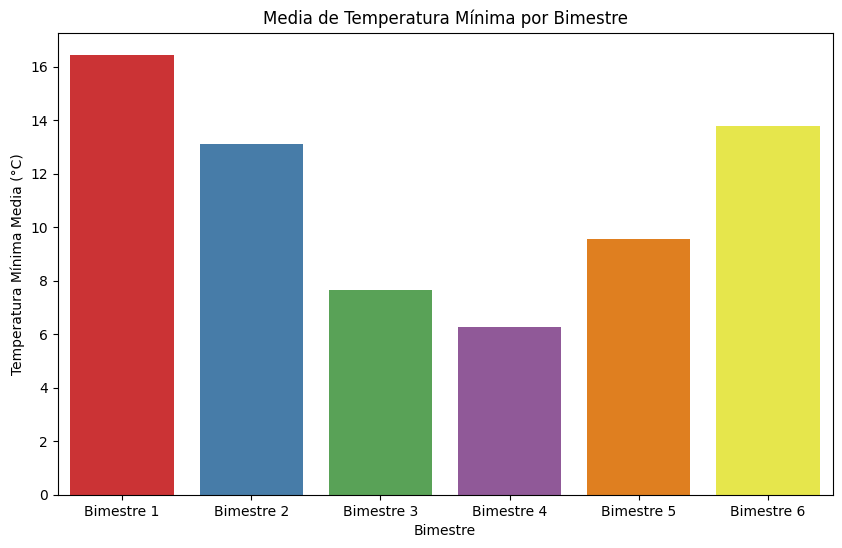

In [42]:
# Calcula la media de temperatura mínima para cada bimestre
mean_temps = df_train.groupby("Bimestre")["MinTemp"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Bimestre",
    y="MinTemp",
    data=mean_temps,
    hue="Bimestre",
    palette="Set1",
    dodge=False,
    legend=False,
)
plt.title("Media de Temperatura Mínima por Bimestre")
plt.xlabel("Bimestre")
plt.ylabel("Temperatura Mínima Media (°C)")
plt.show()

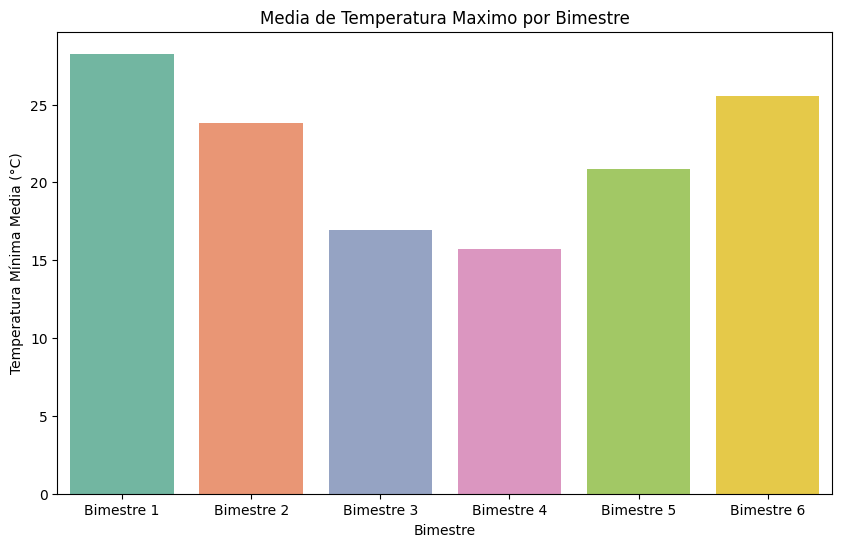

In [43]:
# Calcula la media de temperatura mínima para cada bimestre
mean_temps = df_train.groupby("Bimestre")["MaxTemp"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Bimestre",
    y="MaxTemp",
    data=mean_temps,
    hue="Bimestre",
    palette="Set2",
    dodge=False,
    legend=False,
)
plt.title("Media de Temperatura Maximo por Bimestre")
plt.xlabel("Bimestre")
plt.ylabel("Temperatura Mínima Media (°C)")
plt.show()

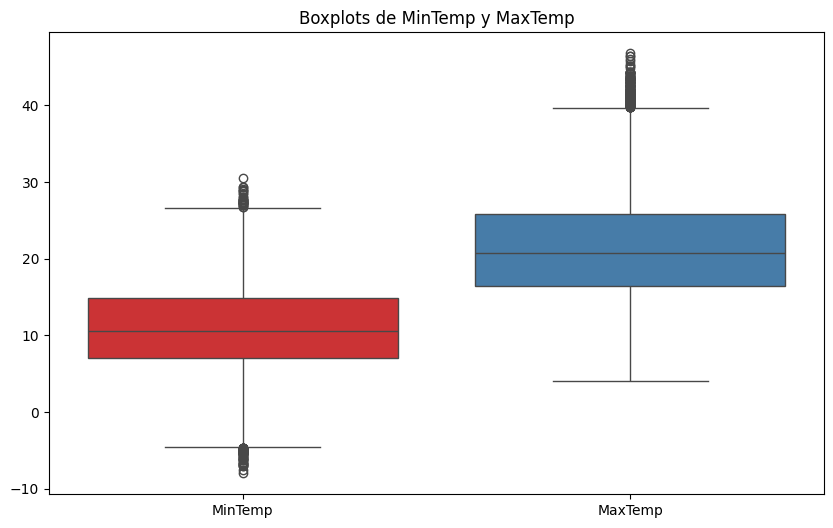

In [44]:
data_to_plot = df_train[["MinTemp", "MaxTemp"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set1")
plt.title("Boxplots de MinTemp y MaxTemp")
plt.show()

Puedo apreciar variaciones en los valores tanto en la variable MinTemp como MaxTemp dependiendo del bimestre del año, a la vez observo outliers por lo que en este caso decido rellenar los valores nulos con la Mediana del bimestre correspondiente a cada registro.


In [45]:
median_min_temp_by_bimestre = df_train.groupby("Bimestre")["MinTemp"].median()

for bimestre, median_temp in median_min_temp_by_bimestre.items():
    df_train.loc[df_train["Bimestre"] == bimestre, "MinTemp"] = df_train.loc[
        df_train["Bimestre"] == bimestre, "MinTemp"
    ].fillna(median_temp)


median_max_temp_by_bimestre = df_train.groupby("Bimestre")["MaxTemp"].median()

for bimestre, median_temp in median_max_temp_by_bimestre.items():
    df_train.loc[df_train["Bimestre"] == bimestre, "MaxTemp"] = df_train.loc[
        df_train["Bimestre"] == bimestre, "MaxTemp"
    ].fillna(median_temp)

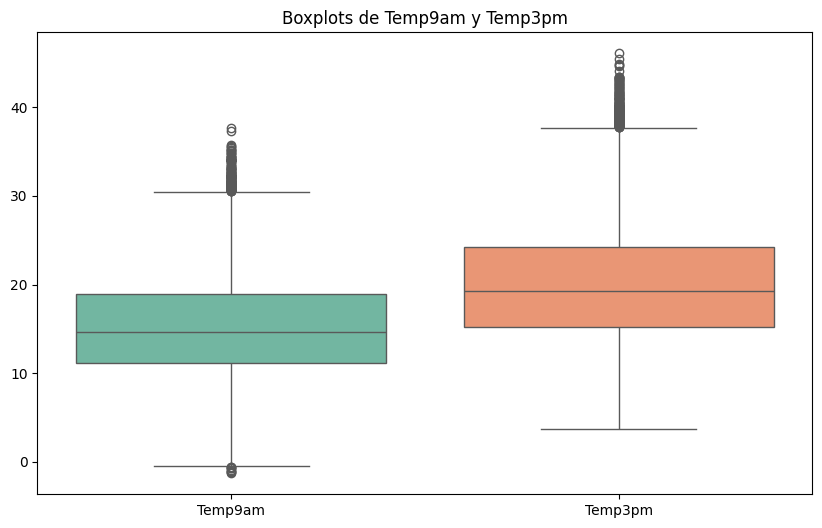

In [46]:
data_to_plot = df_train[["Temp9am", "Temp3pm"]]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set2")
plt.title("Boxplots de Temp9am y Temp3pm")
plt.show()

Completo los valores nulos de Temp9am y Temp3pm con la mediana debido a la presencia de outliers.


In [47]:
df_train["Temp9am"] = df_train.groupby(df_train["Date"].dt.day)["Temp9am"].transform(
    lambda x: x.fillna(x.median())
)
df_train["Temp3pm"] = df_train.groupby(df_train["Date"].dt.day)["Temp3pm"].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipykernel_81584/2841778231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Temp9am"] = df_train.groupby(df_train["Date"].dt.day)["Temp9am"].transform(
/tmp/ipykernel_81584/2841778231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Temp3pm"] = df_train.groupby(df_train["Date"].dt.day)["Temp3pm"].transform(


In [48]:
df_train.isna().sum()

Date                      0
MinTemp                   0
MaxTemp                   0
Rainfall                  0
Evaporation               0
Sunshine                  0
WindGustDir               0
WindGustSpeed             0
WindDir9am                0
WindDir3pm                0
Temp9am                   0
Temp3pm                   0
RainToday               732
RainTomorrow            732
RainfallTomorrow        732
Bimestre                  0
WindSpeed_Difference      0
Humidity_Difference       0
Cloud_Difference          0
Pressure_Difference       0
dtype: int64

Genero una nueva columna llamada 'Dif_Temp' imputandole el valor correspondiente a la diferencia de las columnas 'Temp3pm' y 'Temp9am' **( 'Temp3pm' - 'Temp9am' )**


In [49]:
df_train["Temp_Difference"] = df_train["Temp3pm"] - df_train["Temp9am"]
df_train.drop(["Temp3pm", "Temp9am"], axis=1, inplace=True)

/tmp/ipykernel_81584/1847893392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Temp_Difference"] = df_train["Temp3pm"] - df_train["Temp9am"]
/tmp/ipykernel_81584/1847893392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Temp3pm", "Temp9am"], axis=1, inplace=True)


Genero una nueva columna llamada 'Dif_Temp_Max_Min' imputandole el valor correspondiente a la diferencia de las columnas 'MaxTemp' y 'MinTemp' **( 'MaxTemp' - 'MinTemp' )**


In [50]:
df_train["Dif_Temp_Max_Min"] = df_train["MaxTemp"] - df_train["MinTemp"]
df_train.drop(["MaxTemp", "MinTemp"], axis=1, inplace=True)

/tmp/ipykernel_81584/1083317840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Dif_Temp_Max_Min"] = df_train["MaxTemp"] - df_train["MinTemp"]
/tmp/ipykernel_81584/1083317840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["MaxTemp", "MinTemp"], axis=1, inplace=True)


# Variables: RainToday y RainTomorrow.


La columna 'RainToday' y 'RainTomorrow' tienen valores 'Yes' 'No' por lo que los mapeo a 1 para 'Yes' y 0 para 'No'.

Luego relleno los valores nulos con la Moda agrupando por dia.


In [51]:
moda_RainToday = df_train.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_train["RainToday"] = df_train["RainToday"].fillna(moda_RainToday)

moda_RainTomorrow = df_train.groupby("Date")["RainTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_train["RainTomorrow"] = df_train["RainTomorrow"].fillna(moda_RainTomorrow)

df_train["RainfallTomorrow"] = df_train.groupby(df_train["Date"].dt.day)[
    "RainfallTomorrow"
].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_81584/3354744950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["RainToday"] = df_train["RainToday"].fillna(moda_RainToday)
/tmp/ipykernel_81584/3354744950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["RainTomorrow"] = df_train["RainTomorrow"].fillna(moda_RainTomorrow)
/tmp/ipykernel_81584/3354744950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [52]:
print(df_train["RainToday"].isna().sum())
print(df_train["RainTomorrow"].isna().sum())
print(df_train["RainfallTomorrow"].isna().sum())

0
0
0


In [53]:
df_train["RainToday"] = df_train["RainToday"].map({"Yes": 1, "No": 0})
df_train["RainTomorrow"] = df_train["RainTomorrow"].map({"Yes": 1, "No": 0})

/tmp/ipykernel_81584/1167252328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["RainToday"] = df_train["RainToday"].map({"Yes": 1, "No": 0})
/tmp/ipykernel_81584/1167252328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["RainTomorrow"] = df_train["RainTomorrow"].map({"Yes": 1, "No": 0})


In [54]:
df_train.isna().sum()

Date                    0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir             0
WindGustSpeed           0
WindDir9am              0
WindDir3pm              0
RainToday               0
RainTomorrow            0
RainfallTomorrow        0
Bimestre                0
WindSpeed_Difference    0
Humidity_Difference     0
Cloud_Difference        0
Pressure_Difference     0
Temp_Difference         0
Dif_Temp_Max_Min        0
dtype: int64

# Dummies.


In [55]:
df_train["WindGustDir"].unique()

array(['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [56]:
df_train

,Date,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,Bimestre,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,Pressure_Difference,Temp_Difference,Dif_Temp_Max_Min
6047,2009-01-01,0.0,12.0,12.3,SSW,48.0,ENE,SW,0,0,0.0,Bimestre 1,-42.0,7.0,-3.0,1.900000,6.8,17.3
6048,2009-01-02,0.0,14.8,13.0,S,37.0,SSE,SSE,0,0,0.0,Bimestre 1,-18.0,22.0,0.0,0.800000,6.7,10.5
6049,2009-01-03,0.0,12.6,13.3,SE,30.0,N,N,0,0,0.0,Bimestre 1,-15.0,64.0,5.0,7.520274,18.4,18.6
6050,2009-01-04,0.0,10.8,10.6,NNE,46.0,NNE,NNW,0,0,0.0,Bimestre 1,-16.0,20.0,-5.0,3.100000,6.2,18.2
6051,2009-01-05,0.0,11.4,12.2,WNW,31.0,WNW,WSW,0,0,0.0,Bimestre 1,-25.0,15.0,-4.0,3.600000,6.5,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,0.0,4.6,11.2,SSW,39.0,SSW,S,0,0,0.0,Bimestre 6,-24.0,11.0,-1.0,-0.500000,2.9,15.9
101975,2015-12-28,0.0,5.6,13.6,SSW,44.0,ESE,S,0,0,0.0,Bimestre 6,-27.0,14.0,1.0,2.500000,6.3,18.3
101976,2015-12-29,0.0,6.6,13.6,SW,41.0,ENE,SSW,0,0,0.0,Bimestre 6,-26.0,26.0,0.0,3.500000,10.4,23.1
101977,2015-12-30,0.0,4.8,13.6,W,50.0,NNE,W,0,0,0.0,Bimestre 6,-28.0,18.0,0.0,3.400000,9.8,29.1


In [57]:
orien = [
    "SSW",
    "S",
    "SE",
    "NNE",
    "WNW",
    "N",
    "ENE",
    "NE",
    "E",
    "SW",
    "W",
    "WSW",
    "NNW",
    "ESE",
    "SSE",
    "NW",
]
print(len(orien))

16


Agrupo los valores de la variables categoricas de Direccion, que tiene los siguientes valores:

['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']

El criterio que empleo es asignar a cada punto cardenal el predominante, por ejemplo 'NNW' lo asigno a 'N'

Para los valores como, por ejemplo 'NE' o 'SW' los asigno al ultimo punto cardinal de la notacion.


In [58]:
def agrupar_direcciones(direccion):
    grupos_principales = {
        "N": ["N", "NNW", "NNE"],
        "S": ["S", "SSW", "SSE"],
        "E": ["E", "ENE", "ESE", "SE", "NE"],
        "W": ["W", "WNW", "WSW", "SW", "NW"],
    }

    for grupo, direcciones in grupos_principales.items():
        if direccion in direcciones:
            return grupo

    return "Otro"

In [59]:
df_train["WindGustDir_Agrupado"] = df_train["WindGustDir"].apply(agrupar_direcciones)
df_train["WindDir9am_Agrupado"] = df_train["WindDir9am"].apply(agrupar_direcciones)
df_train["WindDir3pm_Agrupado"] = df_train["WindDir3pm"].apply(agrupar_direcciones)

df_train = df_train.drop("WindGustDir", axis=1)
df_train = df_train.drop("WindDir9am", axis=1)
df_train = df_train.drop("WindDir3pm", axis=1)

/tmp/ipykernel_81584/2163000654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindGustDir_Agrupado"] = df_train["WindGustDir"].apply(agrupar_direcciones)
/tmp/ipykernel_81584/2163000654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["WindDir9am_Agrupado"] = df_train["WindDir9am"].apply(agrupar_direcciones)
/tmp/ipykernel_81584/2163000654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Dummies WindGustDir.


In [60]:
d_WindGustDir = pd.get_dummies(
    df_train["WindGustDir_Agrupado"], dtype=int, drop_first=True
)
d_WindGustDir = d_WindGustDir.rename(
    columns={"N": "WindGustDir_N", "S": "WindGustDir_S", "W": "WindGustDir_W"}
)
df_train = df_train.drop("WindGustDir_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindGustDir], axis=1)

Dummies WindDir9am.


In [61]:
d_WindDir9am = pd.get_dummies(
    df_train["WindDir9am_Agrupado"], dtype=int, drop_first=True
)
d_WindDir9am = d_WindDir9am.rename(
    columns={"N": "WindDir9am_N", "S": "WindDir9am_S", "W": "WindDir9am_W"}
)
df_train = df_train.drop("WindDir9am_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindDir9am], axis=1)

Dummies WindDir3pm.


In [62]:
d_WindDir3pm = pd.get_dummies(
    df_train["WindDir3pm_Agrupado"], dtype=int, drop_first=True
)
d_WindDir3pm = d_WindDir3pm.rename(
    columns={"N": "WindDir3pm_N", "S": "WindDir3pm_S", "W": "WindDir3pm_W"}
)
df_train = df_train.drop("WindDir3pm_Agrupado", axis=1)
df_train = pd.concat([df_train, d_WindDir3pm], axis=1)

In [63]:
df_train.drop("Bimestre", axis=1, inplace=True)
df_train.drop("Date", axis=1, inplace=True)

In [64]:
columnas = df_train.columns
print(columnas)
print(len(columnas))

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday',
       'RainTomorrow', 'RainfallTomorrow', 'WindSpeed_Difference',
       'Humidity_Difference', 'Cloud_Difference', 'Pressure_Difference',
       'Temp_Difference', 'Dif_Temp_Max_Min', 'WindGustDir_N', 'WindGustDir_S',
       'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W',
       'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W'],
      dtype='object')
22


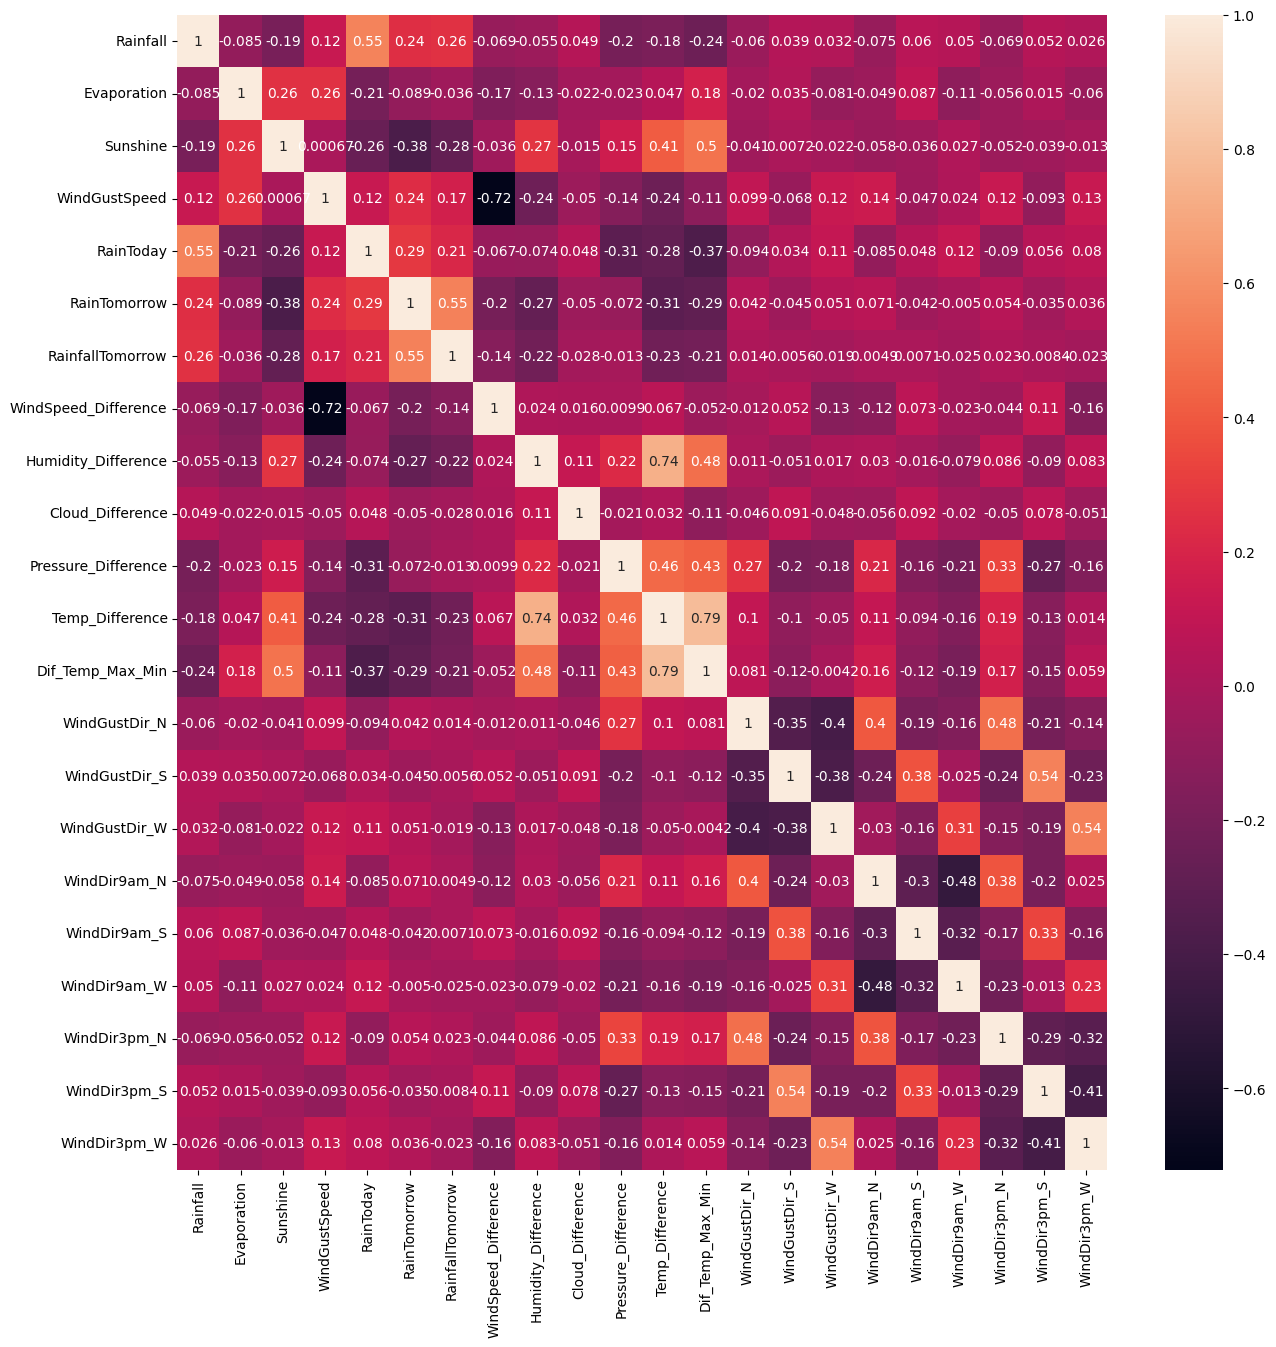

In [67]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train.corr(),
    annot=True,
)
plt.show()

# Estandarizacion.


# Regresion Lineal.


In [71]:
df_train

,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed_Difference,Humidity_Difference,Cloud_Difference,...,Dif_Temp_Max_Min,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,0.0,12.0,12.3,48.0,0,0,0.0,-42.0,7.0,-3.0,...,17.3,0,1,0,0,0,0,0,0,1
6048,0.0,14.8,13.0,37.0,0,0,0.0,-18.0,22.0,0.0,...,10.5,0,1,0,0,1,0,0,1,0
6049,0.0,12.6,13.3,30.0,0,0,0.0,-15.0,64.0,5.0,...,18.6,0,0,0,1,0,0,1,0,0
6050,0.0,10.8,10.6,46.0,0,0,0.0,-16.0,20.0,-5.0,...,18.2,1,0,0,1,0,0,1,0,0
6051,0.0,11.4,12.2,31.0,0,0,0.0,-25.0,15.0,-4.0,...,16.5,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,0.0,4.6,11.2,39.0,0,0,0.0,-24.0,11.0,-1.0,...,15.9,0,1,0,0,1,0,0,1,0
101975,0.0,5.6,13.6,44.0,0,0,0.0,-27.0,14.0,1.0,...,18.3,0,1,0,0,0,0,0,1,0
101976,0.0,6.6,13.6,41.0,0,0,0.0,-26.0,26.0,0.0,...,23.1,0,0,1,0,0,0,0,1,0
101977,0.0,4.8,13.6,50.0,0,0,0.0,-28.0,18.0,0.0,...,29.1,0,0,1,1,0,0,0,0,1


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar tu dataset en un DataFrame de Pandas
# df = pd.read_csv('tu_archivo.csv')

# Separar las características (X) y las etiquetas (y)
X = df.drop('Etiqueta', axis=1)  # Suponiendo que 'Etiqueta' es el nombre de la columna de las etiquetas
y = df['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Una vez ajustado el modelo, puedes hacer predicciones en el conjunto de prueba
predicciones = modelo_regresion.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio:", mse)

# También puedes acceder a los coeficientes del modelo y el término independiente
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_
print("Coeficientes:", coef


NameError: name 'X' is not defined